In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.diagnostic import het_breuschpagan
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


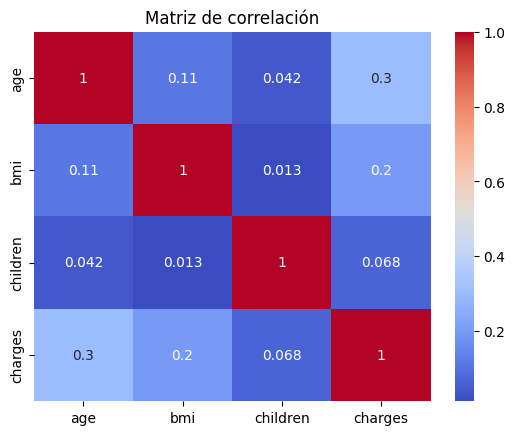

In [33]:
corr = df.corr(numeric_only=True) #
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

In [34]:
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['region'].value_counts())

sex
male      676
female    662
Name: count, dtype: int64
smoker
no     1064
yes     274
Name: count, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [35]:
df["sex_n"] = pd.factorize(df["sex"])[0]
df["smoker_n"] = pd.factorize(df["smoker"])[0]
df["region_n"] = pd.factorize(df["region"])[0]

num_variables = ["age", "bmi", "children", "sex_n", "smoker_n", "region_n", "charges"]

scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])

df[num_variables] = scal_features

print(df.head())

        age     sex       bmi  children smoker     region   charges  sex_n  \
0  0.021739  female  0.321227       0.0    yes  southwest  0.251611    0.0   
1  0.000000    male  0.479150       0.2     no  southeast  0.009636    1.0   
2  0.217391    male  0.458434       0.6     no  southeast  0.053115    1.0   
3  0.326087    male  0.181464       0.0     no  northwest  0.333010    1.0   
4  0.304348    male  0.347592       0.0     no  northwest  0.043816    1.0   

   smoker_n  region_n  
0       0.0  0.000000  
1       1.0  0.333333  
2       1.0  0.333333  
3       1.0  0.666667  
4       1.0  0.666667  


In [36]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe_df = pd.DataFrame(ohe.fit_transform(df[['sex', 'smoker', 'region']]).toarray())

ohe_df.columns = ohe.get_feature_names_out(['sex', 'smoker', 'region'])
df2 = df.join(ohe_df)
df2 = df2.drop(['sex', 'smoker', 'region'], axis=1)

print(df2.head())

        age       bmi  children   charges  sex_n  smoker_n  region_n  \
0  0.021739  0.321227       0.0  0.251611    0.0       0.0  0.000000   
1  0.000000  0.479150       0.2  0.009636    1.0       1.0  0.333333   
2  0.217391  0.458434       0.6  0.053115    1.0       1.0  0.333333   
3  0.326087  0.181464       0.0  0.333010    1.0       1.0  0.666667   
4  0.304348  0.347592       0.0  0.043816    1.0       1.0  0.666667   

   sex_female  sex_male  smoker_no  smoker_yes  region_northeast  \
0         1.0       0.0        0.0         1.0               0.0   
1         0.0       1.0        1.0         0.0               0.0   
2         0.0       1.0        1.0         0.0               0.0   
3         0.0       1.0        1.0         0.0               0.0   
4         0.0       1.0        1.0         0.0               0.0   

   region_northwest  region_southeast  region_southwest  
0               0.0               0.0               1.0  
1               0.0               1.0     

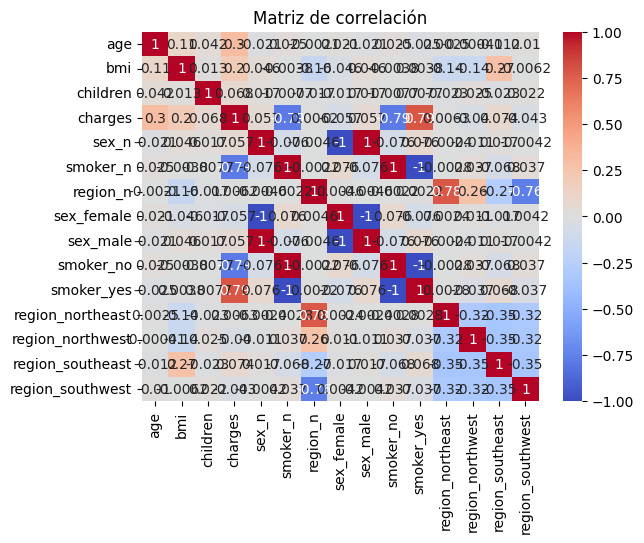

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1338 non-null   float64
 1   bmi               1338 non-null   float64
 2   children          1338 non-null   float64
 3   charges           1338 non-null   float64
 4   sex_n             1338 non-null   float64
 5   smoker_n          1338 non-null   float64
 6   region_n          1338 non-null   float64
 7   sex_female        1338 non-null   float64
 8   sex_male          1338 non-null   float64
 9   smoker_no         1338 non-null   float64
 10  smoker_yes        1338 non-null   float64
 11  region_northeast  1338 non-null   float64
 12  region_northwest  1338 non-null   float64
 13  region_southeast  1338 non-null   float64
 14  region_southwest  1338 non-null   float64
dtypes: float64(15)
memory usage: 156.9 KB


In [37]:
corr = df2.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

df2.info()


In [38]:
X = df2.drop('charges', axis=1)
y = df2['charges']

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     443.9
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:18:02   Log-Likelihood:                 1229.8
No. Observations:                1338   AIC:                            -2440.
Df Residuals:                    1328   BIC:                            -2388.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             4.111e+10   2.96e+10  

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

alphas = [0.0001, 0.001, 0.01, 0.1, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]
lrs = [0, 0.5, 1]
errors = {}

kfold = KFold(n_splits=5, shuffle=True, random_state=123)
for alpha in alphas:
    errors[alpha] = {}
    for lr in lrs:
        fold_errors = []
        model = ElasticNet(alpha=alpha, l1_ratio=lr, random_state=47)
        for train_idx, test_idx in kfold.split(X_train):
            X_train_fold, X_test_fold = X_train.iloc[train_idx], X_train.iloc[test_idx]
            y_train_fold, y_test_fold = y_train.iloc[train_idx], y_train.iloc[test_idx]
            model.fit(X_train_fold, y_train_fold)
            fold_errors.append(mean_squared_error(y_test_fold, model.predict(X_test_fold)))
        errors[alpha][lr] = np.mean(fold_errors)

best_alpha, best_lr = min(
    ((a, l) for a in alphas for l in lrs),
    key=lambda pair: errors[pair[0]][pair[1]]
)

best_model = ElasticNet(alpha=best_alpha, l1_ratio=best_lr, random_state=123)
best_model.fit(X_train, y_train)
final_preds = best_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_preds)

ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, y_train)

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_preds)

y_pred = ridge_cv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.171e+00, tolerance: 3.137e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.079e+00, tolerance: 3.197e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

In [40]:
print(f"Mejor alpha: {best_alpha}, Mejor l1_ratio: {best_lr}")
print(f"Error cuadrático medio en test: {final_mse}")

Mejor alpha: 0.0001, Mejor l1_ratio: 1
Error cuadrático medio en test: 0.007792616888665952


In [41]:
print(f"Lasso MSE: {lasso_mse}")

Lasso MSE: 0.03899769121051379


In [42]:
print(f"Error Cuadrático Medio (MSE) en validación: {mse}")
print(f"Coeficiente de Determinación (R²) en validación: {r2}")

Error Cuadrático Medio (MSE) en validación: 0.007791254635829282
Coeficiente de Determinación (R²) en validación: 0.7999978524143302
